<font color='red' size='+6'>Solomon Tuah _8678021</font>

<font color='red' size='+3'>My first Jupyter notebook</font>

<font color='blue' size='+2'>Import Packages/Modules</font>

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from cartopy import crs,  feature

<font color='blue' size='+2'>Read CRU Data</font>

In [2]:
ds=xr.open_dataset('Africa_cru_data.nc') 
ds                  

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

<font color='blue' size='+2'>Information about the CRU Data</font>

In [3]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk>

In [4]:
ds.pre

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

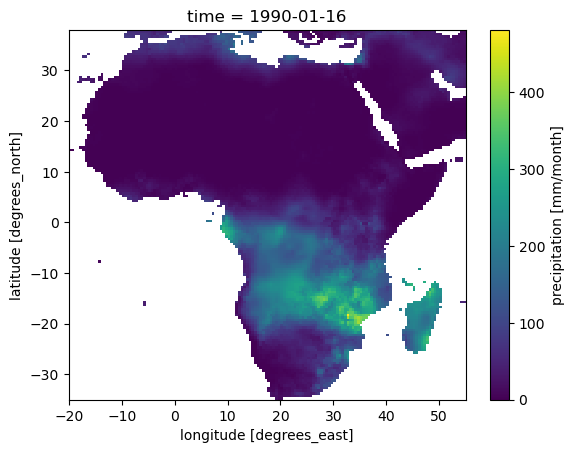

In [5]:
ds.pre.sel(time='1990-01').plot()

<font color='blue' size='+2'>Select Data from a station(Kumasi)</font>

In [6]:
precipitation=ds.pre

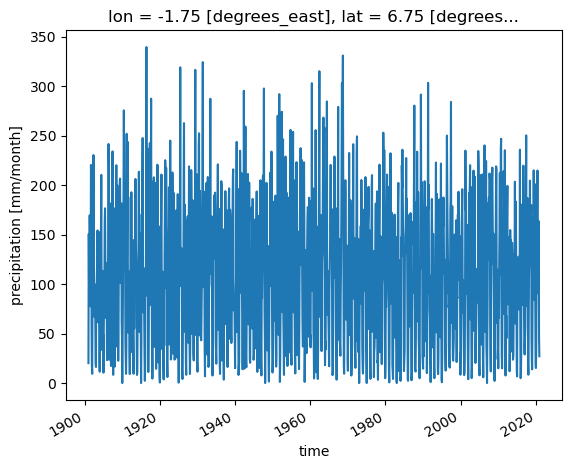

In [7]:
Kumasi_da = precipitation.sel(lat=6.667,lon=-1.616,method='nearest')
Kumasi_da .plot()                             

<font color='blue' size='+2'>Extract Data over GHana</font>

In [8]:
Ghana_da = precipitation.sel(lon=slice(-3.5,1.5),lat=slice(4.5,11.5))
Ghana_da
                  

<xarray.DataArray 'pre' (time: 1440, lat: 14, lon: 10)>
[201600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

<font color='blue' size='+2'>A plot of Ghana Data</font>

(array([7.5466e+04, 4.6357e+04, 3.9497e+04, 1.8362e+04, 5.8610e+03,
        1.2640e+03, 2.6800e+02, 8.1000e+01, 3.2000e+01, 1.2000e+01]),
 array([  0. ,  63.7, 127.4, 191.1, 254.8, 318.5, 382.2, 445.9, 509.6,
        573.3, 637. ], dtype=float32),
 <BarContainer object of 10 artists>)

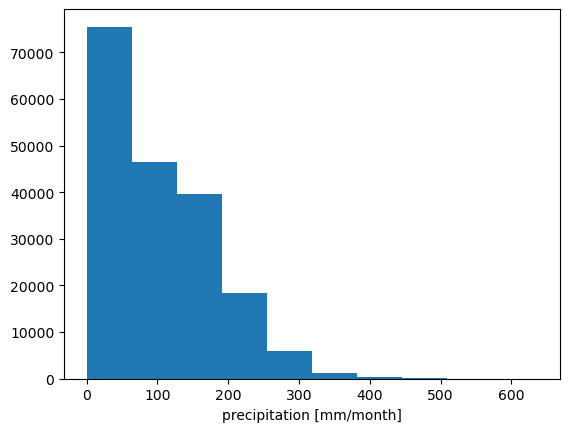

In [9]:
Ghana_da.plot()

In [10]:
Ghana_da.mean('time')

<xarray.DataArray 'pre' (lat: 14, lon: 10)>
array([[       nan, 123.88656 , 121.19645 , 118.077095, 116.07285 ,
               nan,        nan,        nan,        nan,        nan],
       [135.63197 , 131.90115 , 124.32951 , 112.13163 ,  99.97197 ,
         91.63282 , 110.71084 ,        nan,        nan,        nan],
       [127.6141  , 125.54788 , 119.86109 , 112.10953 , 103.95366 ,
         94.83946 ,  85.01541 ,  82.5692  , 110.89364 ,        nan],
       [117.83892 , 117.85    , 115.9037  , 111.06285 , 107.064095,
        101.349556,  97.21325 ,  93.30697 ,  91.85503 ,  90.01373 ],
       [110.15154 , 109.92333 , 109.99848 , 109.33098 , 107.593544,
        104.43031 , 101.42494 , 103.6542  , 103.833496,  95.128334],
       [103.96382 , 104.407295, 103.74517 , 106.10292 , 104.94298 ,
        103.76735 , 103.60216 , 105.617294, 109.18264 ,  96.46718 ],
       [ 99.73744 , 100.55428 , 100.277245, 102.06356 , 101.692184,
        101.99731 , 103.127464, 105.30481 , 108.38806 ,  97.53164 ],
       [ 97.26618 ,  98.45367 ,  96.653496,  97.56831 ,  98.40812 ,
         99.26256 , 101.523315, 104.01571 , 107.015   ,  99.12235 ],
       [ 94.73707 ,  93.63084 ,  93.62449 ,  93.94169 ,  94.684784,
         97.06949 , 100.2246  , 101.87857 , 106.3844  , 101.457924],
       [ 92.67192 ,  90.63403 ,  91.554276,  91.93433 ,  91.86413 ,
         94.296455,  98.259285, 100.21299 , 104.19449 , 104.91709 ],
       [ 90.99365 ,  88.96442 ,  89.554855,  90.26259 ,  89.27182 ,
         91.427605,  94.042755,  95.58093 ,  98.440216, 101.68265 ],
       [ 89.726036,  87.115425,  87.27514 ,  86.60229 ,  86.365845,
         87.556854,  89.52512 ,  89.99186 ,  90.70842 ,  94.86141 ],
       [ 85.743965,  84.48771 ,  84.984146,  83.94241 ,  84.645935,
         84.24635 ,  84.774635,  85.807495,  84.66725 ,  86.238365],
       [ 82.34073 ,  80.904816,  80.58856 ,  80.912834,  80.71788 ,
         80.03102 ,  79.4794  ,  79.728134,  78.439575,  78.60652 ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25

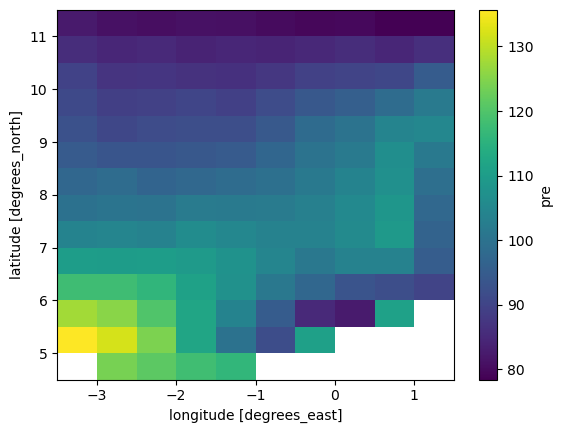

In [11]:
Ghana_da.mean('time').plot()

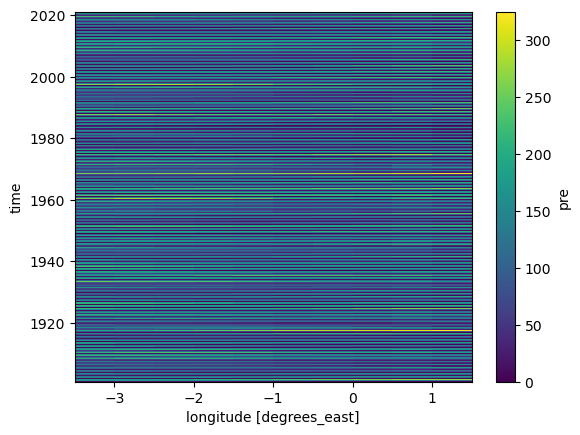

In [12]:
Ghana_da.mean('lat').plot()

<font color='blue' size='+2'>Split Data into 4 Climate Regimes 

CR1 = 1901-1930 

CR2 = 1931-1960

CR3 = 1961-1990

CR4 = 1991-2020
</font>


<font color='blue' size='+2'>Selecting the Clmiate data and assigning them to specific variable</font>


In [13]:
CR1 = Ghana_da.sel(time=slice('1901','1930'))
CR2 = Ghana_da.sel(time=slice('1931','1960'))
CR3 = Ghana_da.sel(time=slice('1961','1990'))
CR4 = Ghana_da.sel(time=slice('1991','2020'))

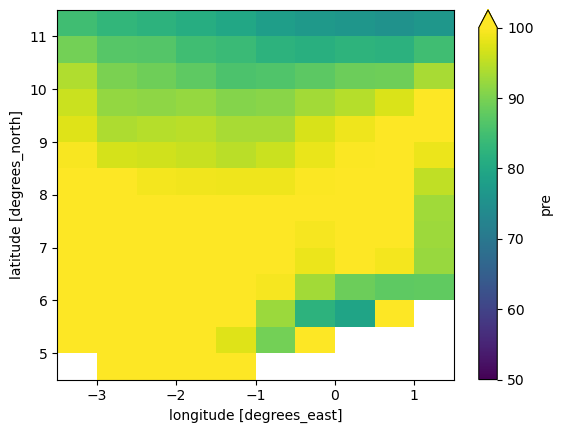

In [14]:
CR1.mean('time').plot(vmin=50,vmax=100)

<font color='blue' size='+2'>CR1 Data</font>

In [15]:
CR1

<xarray.DataArray 'pre' (time: 360, lat: 14, lon: 10)>
array([[[      nan, 7.310e+01, ...,       nan,       nan],
        [4.850e+01, 6.790e+01, ...,       nan,       nan],
        ...,
        [1.900e+00, 8.000e-01, ..., 0.000e+00, 0.000e+00],
        [1.000e+00, 8.000e-01, ..., 0.000e+00, 0.000e+00]],

       [[      nan, 1.673e+02, ...,       nan,       nan],
        [1.350e+02, 2.036e+02, ...,       nan,       nan],
        ...,
        [1.900e+00, 1.600e+00, ..., 8.000e-01, 1.400e+00],
        [1.000e+00, 8.000e-01, ..., 5.000e-01, 0.000e+00]],

       ...,

       [[      nan, 1.068e+02, ...,       nan,       nan],
        [1.239e+02, 1.136e+02, ...,       nan,       nan],
        ...,
        [2.800e+00, 2.300e+00, ..., 3.200e+00, 4.400e+00],
        [2.100e+00, 1.500e+00, ..., 2.100e+00, 1.500e+00]],

       [[      nan, 6.980e+01, ...,       nan,       nan],
        [5.010e+01, 5.350e+01, ...,       nan,       nan],
        ...,
        [2.100e+00, 1.000e-01, ..., 3.000e+00, 1.200e+00],
        [0.000e+00, 0.000e+00, ..., 1.800e+00, 8.000e-01]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 1930-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

<<font color='blue' size='+2'>Grouping by annual sum</font>

In [16]:
CR1_annual_sum = CR1.groupby('time.year').sum('time')
CR2_annual_sum = CR2.groupby('time.year').sum('time')
CR3_annual_sum = CR3.groupby('time.year').sum('time')
CR4_annual_sum = CR4.groupby('time.year').sum('time')

<font color='blue' size='+2'>Mean</font>

In [17]:
CR1_Clim = CR1_annual_sum.mean('year')
CR2_Clim = CR2_annual_sum.mean('year')
CR3_Clim = CR3_annual_sum.mean('year')
CR4_Clim = CR4_annual_sum.mean('year')

<font color='blue' size='+2'>Longterm Annual Change</font>

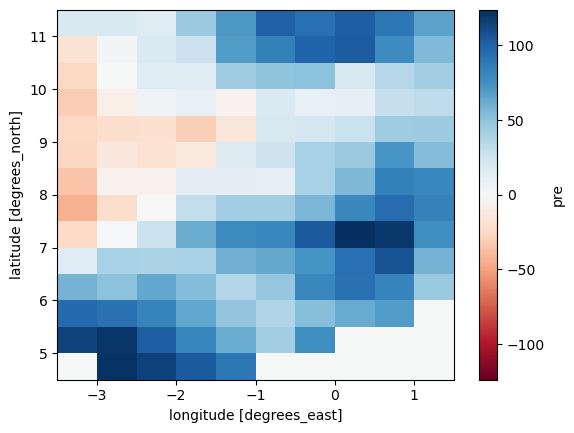

In [18]:
(CR2_Clim - CR1_Clim).plot(cmap=('RdBu'))

<font color='blue' size='+2'>PLot of annual longterm change</font>

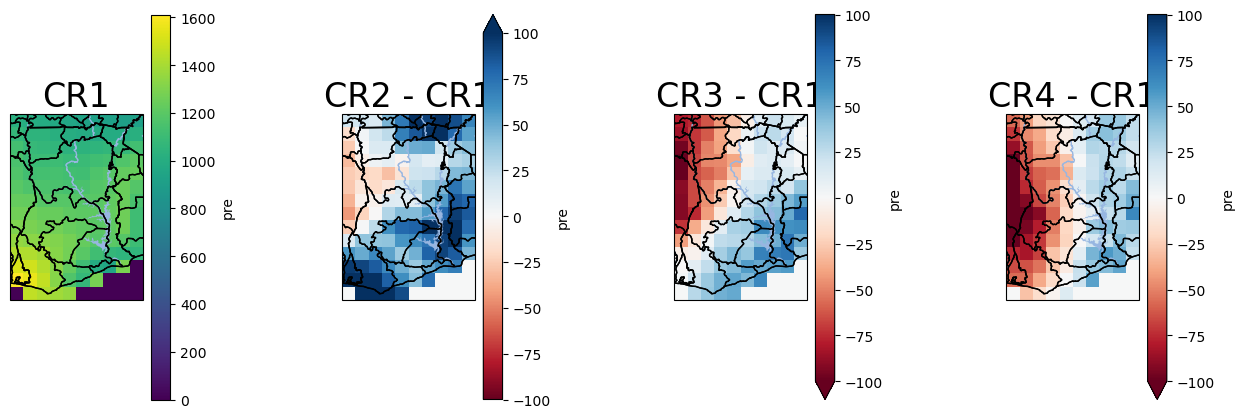

In [19]:
fig = plt.figure(figsize=(15,5)) 
plt.subplots_adjust(wspace=1)
ax1 = plt.subplot(141, projection=crs.PlateCarree())
CR1_Clim.plot(ax=ax1)
ax1.set_title('CR1', fontsize=24)
ax1.coastlines()
ax1.add_feature(feature.BORDERS)
ax1.add_feature(feature.LAKES)
ax1.add_feature(feature.RIVERS)
ax1.add_feature(feature.LAND)
ax1.add_feature(feature.OCEAN)
ax1.add_feature(feature.STATES)


ax2 = plt.subplot(142, projection=crs.PlateCarree())
(CR2_Clim - CR1_Clim).plot(ax=ax2, cmap='RdBu', vmin=-100, vmax=100)
ax2.set_title('CR2 - CR1', fontsize=24)
ax2.coastlines()
ax2.add_feature(feature.BORDERS)
ax2.add_feature(feature.LAKES)
ax2.add_feature(feature.RIVERS)
ax2.add_feature(feature.LAND)
ax2.add_feature(feature.OCEAN)
ax2.add_feature(feature.STATES)

ax3 = plt.subplot(143, projection=crs.PlateCarree())
(CR3_Clim - CR1_Clim).plot(ax=ax3, cmap='RdBu', vmin=-100, vmax=100)
ax3.set_title('CR3 - CR1', fontsize=24)
ax3.coastlines()
ax3.add_feature(feature.BORDERS)
ax3.add_feature(feature.LAKES)
ax3.add_feature(feature.RIVERS)
ax3.add_feature(feature.LAND)
ax3.add_feature(feature.OCEAN)
ax3.add_feature(feature.STATES)

ax4 = plt.subplot(144, projection=crs.PlateCarree())
(CR4_Clim - CR1_Clim).plot(ax=ax4,cmap='RdBu', vmin=-100, vmax=100)
ax4.set_title('CR4 - CR1', fontsize=24)
ax4.coastlines()
ax4.add_feature(feature.BORDERS)
ax4.add_feature(feature.LAKES)
ax4.add_feature(feature.RIVERS)
ax4.add_feature(feature.LAND)
ax4.add_feature(feature.OCEAN)
ax4.add_feature(feature.STATES)

<font color='red' size='+3'>LONG TERM MONTHLY CHANGES</font>



In [20]:
CR1_monthly_sum = CR1.groupby('time.month').mean('time')
CR2_monthly_sum = CR2.groupby('time.month').mean('time')
CR3_monthly_sum = CR3.groupby('time.month').mean('time')
CR4_monthly_sum = CR4.groupby('time.month').mean('time')

In [21]:
CR1_Clim_monthly = CR1_monthly_sum.mean('month')
CR2_Clim_monthly = CR2_monthly_sum.mean('month')
CR3_Clim_monthly = CR3_monthly_sum.mean('month')
CR4_Clim_monthly = CR4_monthly_sum.mean('month')

In [22]:
CR1_Clim_monthly

<xarray.DataArray 'pre' (lat: 14, lon: 10)>
array([[       nan, 121.38972 , 118.34943 , 114.96777 , 112.85389 ,
               nan,        nan,        nan,        nan,        nan],
       [134.36974 , 130.1186  , 122.22693 , 109.84611 ,  97.5525  ,
         89.34583 , 106.64973 ,        nan,        nan,        nan],
       [126.98529 , 124.75333 , 118.75306 , 110.53556 , 102.19888 ,
         92.429726,  82.05195 ,  79.2375  , 107.15722 ,        nan],
       [118.36083 , 118.60361 , 115.73554 , 109.823875, 105.67694 ,
         99.325554,  93.14749 ,  88.73861 ,  87.60916 ,  87.77555 ],
       [112.797516, 111.041664, 110.58555 , 108.91889 , 106.25111 ,
        102.50501 ,  98.63    , 100.19055 ,  99.177216,  92.30306 ],
       [108.40888 , 107.13946 , 105.07917 , 105.67223 , 103.07528 ,
        101.465546,  99.333336, 100.83389 , 104.69778 ,  92.77001 ],
       [105.31472 , 104.99084 , 103.05917 , 102.9125  , 100.93943 ,
        100.57111 , 100.90972 , 102.27139 , 104.79444 ,  92.80945 ],
       [102.51556 , 101.84278 ,  99.104164,  98.8811  ,  98.729164,
         98.70306 ,  99.65528 , 101.43555 , 103.58362 ,  95.27584 ],
       [ 99.4186  ,  96.831665,  96.32806 ,  95.853615,  94.79722 ,
         95.96805 ,  98.41583 ,  99.62722 , 103.924736,  98.60528 ],
       [ 97.505554,  93.894165,  94.410835,  94.77417 ,  93.49389 ,
         93.374725,  97.05307 ,  98.69806 , 102.295006, 103.2839  ],
       [ 95.95695 ,  91.825836,  91.43527 ,  92.03028 ,  90.77612 ,
         91.1836  ,  93.11416 ,  94.44639 ,  97.116394, 100.71667 ],
       [ 94.086395,  89.88944 ,  88.88723 ,  87.68695 ,  85.910286,
         86.26722 ,  87.41694 ,  88.69611 ,  89.0564  ,  93.48221 ],
       [ 89.36889 ,  86.900826,  86.668335,  84.585   ,  83.80778 ,
         82.05945 ,  81.523056,  82.233894,  81.92694 ,  84.57973 ],
       [ 84.75167 ,  82.946396,  82.03333 ,  81.16973 ,  79.841675,
         77.78973 ,  76.90527 ,  76.363884,  75.454445,  76.55279 ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25

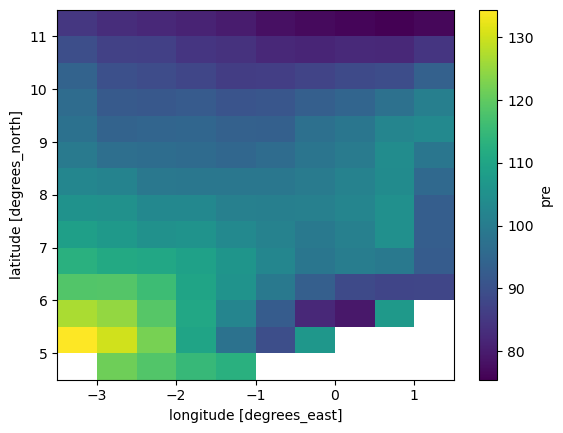

In [23]:
CR1_Clim_monthly.plot()

Text(0.5, 0.98, 'CLIMATE REGIMES FOR ALL FOUR SEAONS')

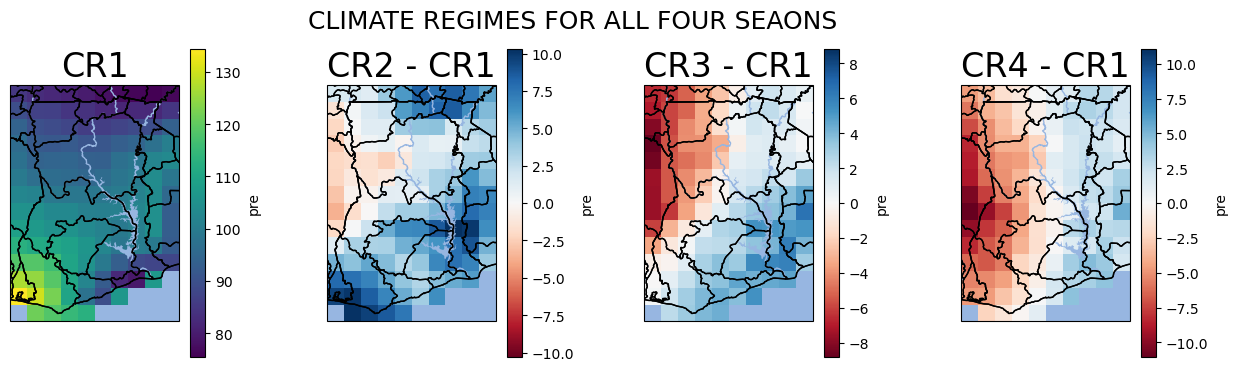

In [34]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(141, projection=crs.PlateCarree())
CR1_Clim_monthly.plot(ax=ax1)
ax1.set_title("CR1", fontsize=24)
ax1.coastlines()
ax1.add_feature(feature.BORDERS)
ax1.add_feature(feature.LAKES)
ax1.add_feature(feature.RIVERS)
ax1.add_feature(feature.LAND)
ax1.add_feature(feature.OCEAN)
ax1.add_feature(feature.STATES)

ax2 = plt.subplot(142, projection=crs.PlateCarree())
(CR2_Clim_monthly - CR1_Clim_monthly).plot(ax=ax2, cmap='RdBu')
ax2.set_title("CR2 - CR1", fontsize=24)
ax2.coastlines()
ax2.add_feature(feature.BORDERS)
ax2.add_feature(feature.LAKES)
ax2.add_feature(feature.RIVERS)
ax2.add_feature(feature.LAND)
ax2.add_feature(feature.OCEAN)
ax2.add_feature(feature.STATES)

ax3= plt.subplot(143, projection=crs.PlateCarree())
(CR3_Clim_monthly - CR1_Clim_monthly).plot(ax=ax3, cmap='RdBu')
ax3.set_title("CR3 - CR1", fontsize=24)
ax3.coastlines()
ax3.add_feature(feature.BORDERS)
ax3.add_feature(feature.LAKES)
ax3.add_feature(feature.RIVERS)
ax3.add_feature(feature.LAND)
ax3.add_feature(feature.OCEAN)
ax3.add_feature(feature.STATES)

ax4= plt.subplot(144, projection=crs.PlateCarree())
(CR4_Clim_monthly - CR1_Clim_monthly).plot(ax=ax4, cmap='RdBu')
ax4.set_title("CR4 - CR1", fontsize=24)
ax4.coastlines()
ax4.add_feature(feature.BORDERS)
ax4.add_feature(feature.LAKES)
ax4.add_feature(feature.RIVERS)
ax4.add_feature(feature.LAND)
ax4.add_feature(feature.OCEAN)
ax4.add_feature(feature.STATES)

plt.suptitle('CLIMATE REGIMES FOR ALL FOUR SEAONS', fontsize=18)                  

                                         

<font color='red' size='+3'>LONG TERM SEASONAL CHANGES</font>

<font color='red' size='+1'>Grouping by season</font>

In [25]:
CR1_seasonal_sum = CR1.groupby('time.season').sum('time')
CR2_seasonal_sum = CR2.groupby('time.season').sum('time')
CR3_seasonal_sum = CR3.groupby('time.season').sum('time')
CR4_seasonal_sum = CR4.groupby('time.season').sum('time')

In [26]:
CR1_seasonal_sum

<xarray.DataArray 'pre' (season: 4, lat: 14, lon: 10)>
array([[[    0.      ,  4196.3003  ,  4406.4004  ,  4359.501   ,
          4415.1006  ,     0.      ,     0.      ,     0.      ,
             0.      ,     0.      ],
        [ 3908.7007  ,  4117.0005  ,  4101.5005  ,  3521.6     ,
          3012.5002  ,  2868.2998  ,  4107.002   ,     0.      ,
             0.      ,     0.      ],
        [ 3538.101   ,  3761.2996  ,  3887.7996  ,  3690.8994  ,
          3539.4995  ,  3256.5999  ,  2730.4004  ,  2646.8994  ,
          4201.3003  ,     0.      ],
        [ 2967.8997  ,  3366.7998  ,  3719.2996  ,  3682.0002  ,
          3707.4995  ,  3637.7     ,  3309.8997  ,  3328.7998  ,
          2954.4995  ,  2527.1995  ],
        [ 2536.7     ,  2745.1997  ,  3142.5999  ,  3429.9     ,
          3409.1995  ,  3212.4004  ,  3095.9998  ,  3505.3992  ,
          3462.7     ,  2766.3     ],
        [ 2103.2998  ,  2227.5005  ,  2330.4998  ,  2560.3     ,
          2552.5996  ,  2378.5999  ,  2207.1997  ,  2431.6008  ,
          2955.801   ,  2122.9     ],
        [ 1613.2     ,  1744.5999  ,  1639.1996  ,  1715.9     ,
          1703.2998  ,  1567.7997  ,  1267.3     ,  1595.0001  ,
...
         11686.501   , 11499.8     , 11467.604   , 11363.898   ,
         10881.7     ,  9623.2     ],
        [11187.8     , 11190.8     , 11302.603   , 11265.297   ,
         11303.1     , 11157.098   , 11373.997   , 11342.2     ,
         11211.3     , 10202.498   ],
        [10831.9     , 10657.5     , 10769.998   , 11038.399   ,
         10949.4     , 10821.701   , 11094.399   , 11199.799   ,
         11500.797   , 10923.2     ],
        [10236.201   ,  9829.399   ,  9926.299   , 10265.097   ,
         10297.4     , 10225.399   , 10343.2     , 10456.397   ,
         10900.497   , 10989.4     ],
        [ 9454.697   ,  9154.302   ,  9135.501   ,  9221.9     ,
          9095.498   ,  9069.401   ,  9189.699   ,  9470.001   ,
          9636.699   , 10139.199   ],
        [ 8593.501   ,  8403.801   ,  8418.198   ,  8188.999   ,
          8180.802   ,  8012.7     ,  8048.9014  ,  8305.999   ,
          8408.001   ,  8615.8     ],
        [ 7805.6006  ,  7565.403   ,  7535.4995  ,  7394.2     ,
          7115.4     ,  7178.399   ,  7088.5005  ,  7154.0024  ,
          7122.9985  ,  7257.6016  ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

<font color='red' size='+1'>mean of the seasonal climatology</font>

In [27]:
CR1_clim_season = CR1_seasonal_sum.mean('season')
CR2_clim_season = CR2_seasonal_sum.mean('season')
CR3_clim_season = CR3_seasonal_sum.mean('season')
CR4_clim_season = CR4_seasonal_sum.mean('season')

In [28]:
CR1_clim_season

<xarray.DataArray 'pre' (lat: 14, lon: 10)>
array([[    0.    , 10925.075 , 10651.451 , 10347.101 , 10156.852 ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [12093.274 , 11710.675 , 11000.424 ,  9886.149 ,  8779.725 ,
         8041.125 ,  9598.475 ,     0.    ,     0.    ,     0.    ],
       [11428.675 , 11227.8   , 10687.775 ,  9948.199 ,  9197.898 ,
         8318.674 ,  7384.675 ,  7131.3745,  9644.149 ,     0.    ],
       [10652.476 , 10674.325 , 10416.201 ,  9884.15  ,  9510.925 ,
         8939.301 ,  8383.273 ,  7986.4756,  7884.825 ,  7899.8   ],
       [10151.774 ,  9993.75  ,  9952.699 ,  9802.699 ,  9562.6   ,
         9225.449 ,  8876.701 ,  9017.15  ,  8925.949 ,  8307.275 ],
       [ 9756.8   ,  9642.55  ,  9457.125 ,  9510.5   ,  9276.773 ,
         9131.9   ,  8940.    ,  9075.051 ,  9422.8   ,  8349.3   ],
       [ 9478.324 ,  9449.176 ,  9275.323 ,  9262.125 ,  9084.551 ,
         9051.4   ,  9081.875 ,  9204.426 ,  9431.5   ,  8352.851 ],
       [ 9226.4   ,  9165.851 ,  8919.375 ,  8899.301 ,  8885.624 ,
         8883.274 ,  8968.977 ,  9129.2   ,  9322.525 ,  8574.825 ],
       [ 8947.675 ,  8714.851 ,  8669.526 ,  8626.824 ,  8531.75  ,
         8637.123 ,  8857.424 ,  8966.449 ,  9353.225 ,  8874.475 ],
       [ 8775.5   ,  8450.474 ,  8496.975 ,  8529.675 ,  8414.449 ,
         8403.727 ,  8734.774 ,  8882.824 ,  9206.549 ,  9295.549 ],
       [ 8636.125 ,  8264.324 ,  8229.176 ,  8282.724 ,  8169.85  ,
         8206.525 ,  8380.274 ,  8500.174 ,  8740.474 ,  9064.5   ],
       [ 8467.775 ,  8090.05  ,  7999.8506,  7891.824 ,  7731.9253,
         7764.051 ,  7867.5254,  7982.6504,  8015.074 ,  8413.4   ],
       [ 8043.199 ,  7821.0757,  7800.1494,  7612.6494,  7542.7   ,
         7385.3506,  7337.076 ,  7401.049 ,  7373.426 ,  7612.175 ],
       [ 7627.6504,  7465.1753,  7383.0005,  7305.2754,  7185.7495,
         7001.0747,  6921.4746,  6872.7515,  6790.899 ,  6889.75  ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25

In [29]:
CR2_clim_season

<xarray.DataArray 'pre' (lat: 14, lon: 10)>
array([[    0.    , 11839.951 , 11519.1   , 11127.176 , 10827.425 ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [12955.124 , 12615.301 , 11764.201 , 10498.324 ,  9243.275 ,
         8361.05  , 10171.95  ,     0.    ,     0.    ,     0.    ],
       [12149.126 , 11916.375 , 11309.35  , 10429.65  ,  9566.524 ,
         8596.426 ,  7776.575 ,  7595.301 , 10163.699 ,     0.    ],
       [11089.125 , 11051.452 , 10898.324 , 10284.949 ,  9781.451 ,
         9300.025 ,  8991.3   ,  8680.975 ,  8507.824 ,  8246.299 ],
       [10263.9   , 10297.625 , 10247.249 , 10104.249 , 10005.324 ,
         9696.499 ,  9429.875 ,  9719.125 ,  9727.725 ,  8747.05  ],
       [ 9568.801 ,  9650.475 ,  9653.275 ,  9969.225 ,  9864.198 ,
         9738.175 ,  9722.199 , 10002.575 , 10316.301 ,  8928.775 ],
       [ 9151.676 ,  9284.074 ,  9272.525 ,  9487.249 ,  9410.5   ,
         9373.724 ,  9509.1   ,  9801.873 , 10141.899 ,  8981.074 ],
       [ 8962.75  ,  9128.2   ,  8882.875 ,  8994.    ,  8975.6   ,
         8963.25  ,  9269.175 ,  9549.25  ,  9958.775 ,  9170.849 ],
       [ 8745.45  ,  8620.575 ,  8525.024 ,  8536.376 ,  8651.6   ,
         8832.7   ,  9159.124 ,  9313.9   ,  9900.199 ,  9278.2   ],
       [ 8583.899 ,  8287.773 ,  8348.073 ,  8306.074 ,  8311.699 ,
         8557.074 ,  8897.576 ,  9091.524 ,  9537.524 ,  9635.525 ],
       [ 8398.477 ,  8212.426 ,  8270.099 ,  8357.2   ,  8146.376 ,
         8341.149 ,  8455.7   ,  8586.825 ,  8953.875 ,  9307.451 ],
       [ 8274.274 ,  8094.199 ,  8108.9004,  8002.7246,  8061.1006,
         8137.225 ,  8249.875 ,  8128.8486,  8282.398 ,  8734.3   ],
       [ 7909.001 ,  7845.8003,  7942.624 ,  7810.677 ,  8057.4253,
         8019.5747,  8080.8994,  8173.374 ,  7954.3755,  8020.574 ],
       [ 7779.3984,  7610.45  ,  7495.6245,  7646.6997,  7721.7236,
         7755.3516,  7618.7495,  7637.4497,  7457.7246,  7382.9746]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25

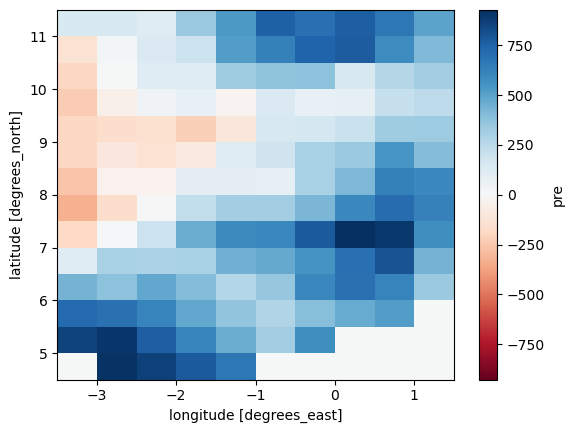

In [30]:
(CR2_clim_season - CR1_clim_season).plot(cmap="RdBu")

<font color='red' size='+1.5'>PLots of Seasoanal climatology</font>

Text(0.5, 0.98, 'CLIMATE REGIMES FOR ALL FOUR SEAONS')

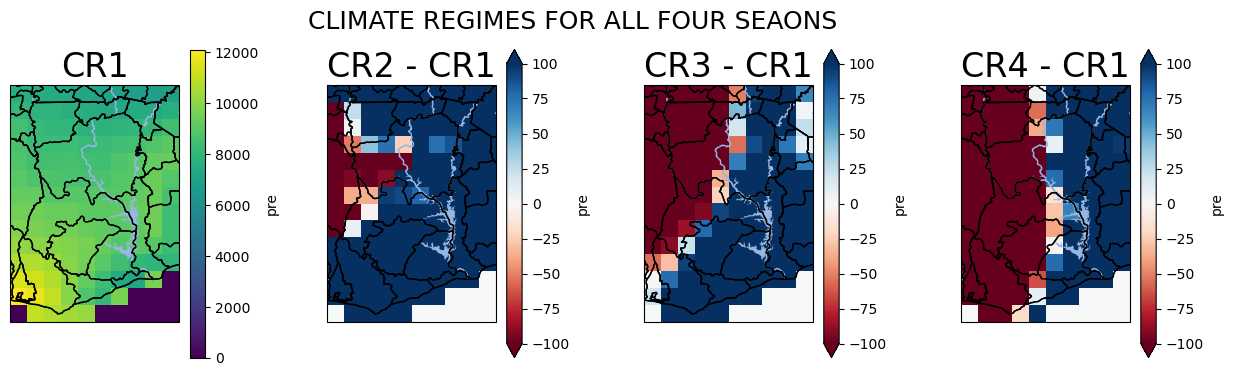

In [35]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(141, projection=crs.PlateCarree())
CR1_clim_season.plot(ax=ax1)
ax1.set_title("CR1", fontsize=24)
ax1.coastlines()
ax1.add_feature(feature.BORDERS)
ax1.add_feature(feature.LAKES)
ax1.add_feature(feature.RIVERS)
ax1.add_feature(feature.LAND)
ax1.add_feature(feature.OCEAN)
ax1.add_feature(feature.STATES)

ax2 = plt.subplot(142, projection=crs.PlateCarree())
(CR2_clim_season - CR1_clim_season).plot(ax=ax2, cmap='RdBu', vmin=-100, vmax=100)
ax2.set_title("CR2 - CR1", fontsize=24)
ax2.coastlines()
ax2.add_feature(feature.BORDERS)
ax2.add_feature(feature.LAKES)
ax2.add_feature(feature.RIVERS)
ax2.add_feature(feature.LAND)
ax2.add_feature(feature.OCEAN)
ax2.add_feature(feature.STATES)

ax3= plt.subplot(143, projection=crs.PlateCarree())
(CR3_clim_season - CR1_clim_season).plot(ax=ax3, cmap='RdBu', vmin=-100, vmax=100)
ax3.set_title("CR3 - CR1", fontsize=24)
ax3.coastlines()
ax3.add_feature(feature.BORDERS)
ax3.add_feature(feature.LAKES)
ax3.add_feature(feature.RIVERS)
ax3.add_feature(feature.LAND)
ax3.add_feature(feature.OCEAN)
ax3.add_feature(feature.STATES)

ax4= plt.subplot(144, projection=crs.PlateCarree())
(CR4_clim_season - CR1_clim_season).plot(ax=ax4, cmap='RdBu', vmin=-100, vmax=100)
ax4.set_title("CR4 - CR1", fontsize=24)
ax4.coastlines()
ax4.add_feature(feature.BORDERS)
ax4.add_feature(feature.LAKES)
ax4.add_feature(feature.RIVERS)
ax4.add_feature(feature.LAND)
ax4.add_feature(feature.OCEAN)
ax4.add_feature(feature.STATES)

plt.suptitle('CLIMATE REGIMES FOR ALL FOUR SEAONS', fontsize=18)                                         

In [1]:
!pip install nbconvert


Defaulting to user installation because normal site-packages is not writeable
